# ch06 차원축소

In [41]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris= load_iris()

# 공분산 행렬

In [4]:
from sklearn.preprocessing import StandardScaler

iris_std = StandardScaler().fit_transform(iris.data)
iris_std[:3, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [5]:
iris_cov=np.dot(iris_std.T,iris_std)/len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [6]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [7]:
iris_cov1=np.dot(iris_std.T,iris_std)/len(iris_std)
iris_cov1

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# PCA

In [8]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)

pca.fit(iris_std)
iris_pca=pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [9]:
iris_pca[:3, :]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

In [10]:
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


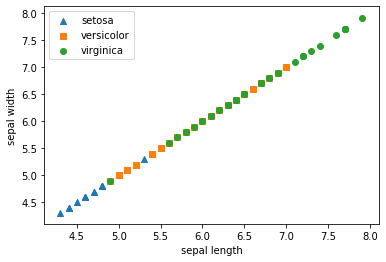

In [11]:
markers=['^','s','o']
for i,marker in enumerate(markers):
    x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data=irisDF[irisDF['target']==i]['sepal_length']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])
    
    
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

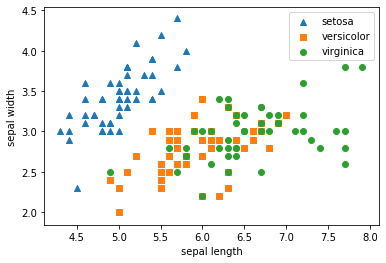

In [12]:

markers=['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)


pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

NameError: name 'iris_scaled' is not defined

In [15]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


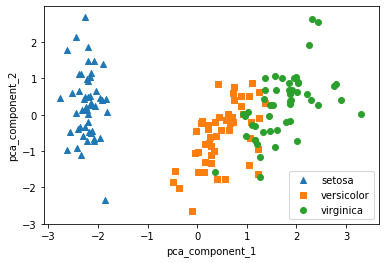

In [16]:
markers=['^', 's', 'o']


for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [18]:
print(pca.explained_variance_ratio_)

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf , iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 교차 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 교차 평균 정확도: 0.96


# k평균을 이용한 붓꽃데이터 세트 군집화

In [29]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [31]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [33]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [38]:
from sklearn.decomposition import PCA


pca=PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


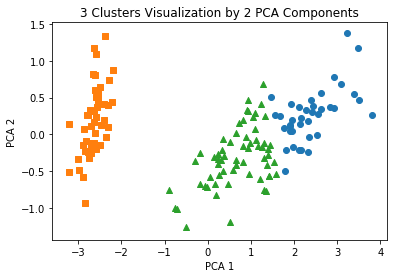

In [39]:
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index


plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [42]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [43]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


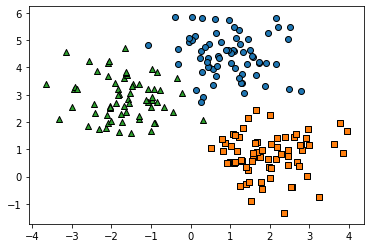

In [44]:
target_list = np.unique(y)

markers=['o', 's', '^', 'P','D','H','x']
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

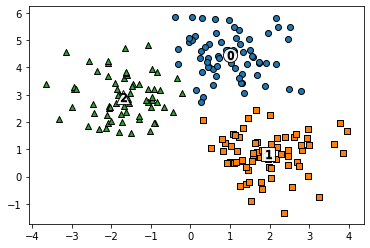

In [52]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label']  = cluster_labels


centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']


for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [53]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


In [ ]:
128page

In [56]:
#군집 평가

from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [54]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_


score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape' , score_samples.shape)


irisDF['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}'.format(average_score))

irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [55]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [58]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    
    
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    
    for ind, n_cluster in enumerate(cluster_lists):
        
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
       
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

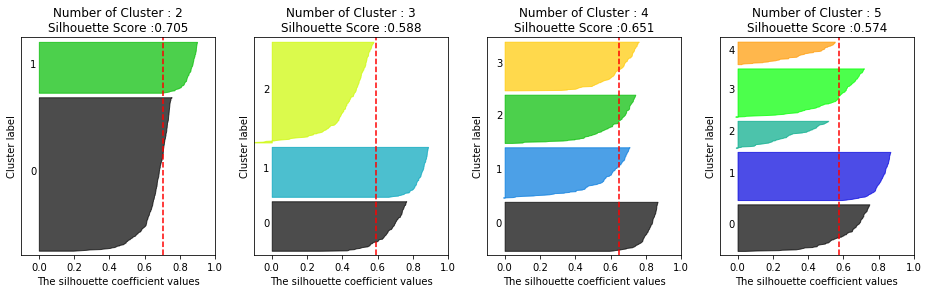

In [60]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

visualize_silhouette([ 2, 3, 4, 5], X)

### dbscan

In [63]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)


irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64
